In [17]:
import torch
import torchvision

In [18]:
from torchvision import datasets
from torchvision import transforms

In [19]:
train=datasets.MNIST(root="./",train=True,transform=transforms.ToTensor(),download=True)

In [20]:
test=datasets.MNIST(root="./",train=False,transform=transforms.ToTensor(),download=True)

In [21]:
X_train=train.train_data
Y_train=train.train_labels
X_test=test.test_data
Y_test=test.test_labels

/home/user/Downloads/yes/lib/python3.9/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/user/Downloads/yes/lib/python3.9/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/home/user/Downloads/yes/lib/python3.9/site-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/home/user/Downloads/yes/lib/python3.9/site-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [22]:
X_train.shape
X_train=X_train.reshape(-1,784)
X_train=X_train.float()
X_test=X_test.float()
X_test=X_test.reshape(-1,784)

In [23]:
X_test.shape

torch.Size([10000, 784])

In [24]:
import torch.nn as nn
import torch.optim as opt
loss_fn= nn.CrossEntropyLoss()


In [25]:
28*28

784

In [26]:
class Mymodel(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.net=nn.Sequential(
            nn.Linear(784,512),
            nn.ReLU(),
            nn.Linear(512,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10),
            nn.Softmax()
        )

    def forward(self,X):
        return self.net(X)

In [27]:
X_train.shape

torch.Size([60000, 784])

In [28]:
def accuracy(pred,truth):
    return( torch.argmax(pred,axis=1)==truth).float().mean()

In [29]:
model=Mymodel()
optimizer=opt.Adam(model.parameters())

loss_lt=[]
acc_list=[]
va
for i in range(10):
    y_pred=model(X_train)
    loss=loss_fn(y_pred,Y_train)
    loss_lt.append(loss.item())
    acc_list.append(accuracy(y_pred,Y_train))

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    

/home/user/Downloads/yes/lib/python3.9/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


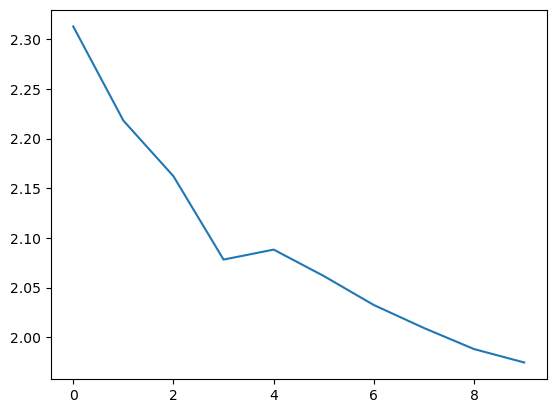

In [30]:
import matplotlib.pyplot as plt
plt.plot(loss_lt)



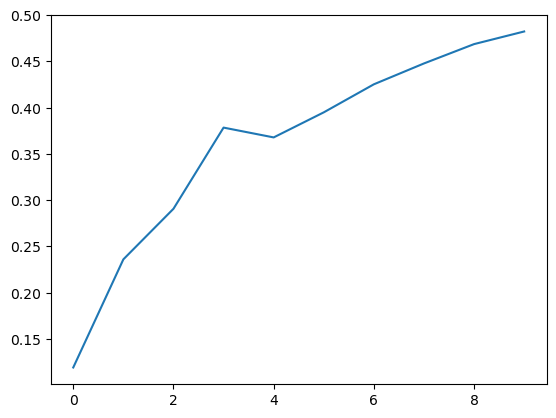

In [31]:
plt.plot(acc_list)